In [3]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math

In [4]:
# plot the data points in red and blue (for 0 and 1, respectively).
# then plot the contours of the decision function (of classifier clf)
# and highlight the decision boundary in solid black.
# If margins=1 then highlight the margins in dashed black

def dfContour(clf,data,margins=0):
    
    X,y = data
    # plot the data
    colors = np.array(['r','b'])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y],s=3)
    
    # form a mesh/grid to cover the data
    h = 0.02
    x_min = X[:, 0].min() - .5
    x_max = X[:, 0].max() + .5
    y_min = X[:, 1].min() - .5
    y_max = X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh = np.c_[xx.ravel(),yy.ravel()]
    
    # evaluate the decision functrion at the grid points
    Z = clf.decision_function(mesh)
    
    # plot the contours of the decision function
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[-4,-3,-2,-1,0,1,2,3,4], cmap=cm.RdBu, alpha=0.5)
    
    # draw the decision boundary in solid black
    plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='solid')
    if margins:
        # draw the margins in dashed black
        plt.contour(xx, yy, Z, levels=[-1,1], colors='k', linestyles='dashed')

In [5]:
# plot the decision function of classifier clf in 3D.
# if Cflag=1, place a contour plot of the decision function beneath the 3D plot.
# (Use data to determine the range of the axes)

def df3D(clf,data,cFlag=1):    
    
    # form a mesh/grid to cover the data
    h = 0.01
    X,y = data
    x_min = X[:, 0].min() - .5
    x_max = X[:, 0].max() + .5
    y_min = X[:, 1].min() - .5
    y_max = X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh = np.c_[xx.ravel(),yy.ravel()]
    
    # evaluate the decision functrion at the grid points
    Z = clf.decision_function(mesh)
    Z = -Z    # to improve the 3D plot for the Moons data set, negate Z
    
    # plot the contours of the decision function
    Z = Z.reshape(xx.shape)
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(xx, yy, Z, cmap=cm.RdBu, linewidth=0.2,edgecolor='k')
    
    if cFlag == 1:
        # display a contour plot of the decision function
        Zmin = np.min(Z) - 1.0
        ax.contourf(xx, yy, Z, cmap=cm.RdBu, offset=Zmin)
        ax.set_zlim(bottom=Zmin)

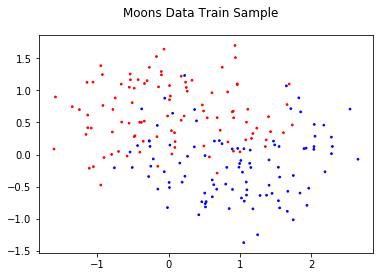

In [6]:
#Training Data
train_data = datasets.make_moons(n_samples=200, noise=0.4)
X_train,Y_train = train_data
plt.figure()
plt.suptitle('Moons Data Train Sample')
colors = np.array(['r','b'])
plt.scatter(X_train[:, 0], X_train[:, 1], color=colors[Y_train],s=3)

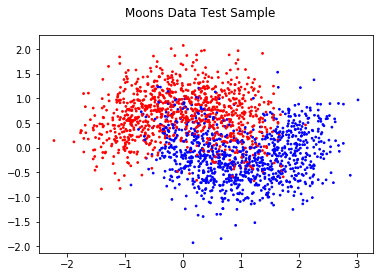

In [7]:
#Testing Data
test_data = datasets.make_moons(n_samples=2000, noise=0.4)
X_test,Y_test = test_data
plt.figure()
plt.suptitle('Moons Data Test Sample')
colors = np.array(['r','b'])
plt.scatter(X_test[:, 0], X_test[:, 1], color=colors[Y_test],s=3)

Training and Testing data samples have been created and plotted.

C0 = 21.5443 
gamma0 = 0.4924 
Min Error = 0.1310 
log(C0) = 1.3333


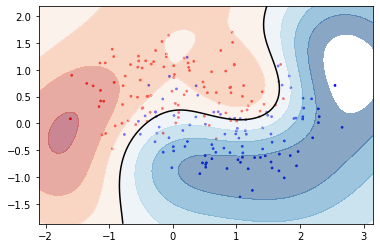

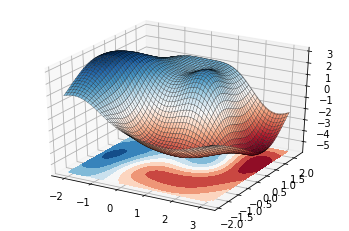

In [8]:
#------------------ Calculations for Part II ------------------------------------
log_C1 = -4
log_C2 = 4
log_G1 = -4
log_G2 = 4
C_count = 40
G_count = 40
logC_array = np.logspace(log_C1, log_C2, num = C_count)
logY_array = np.logspace(log_G1, log_G2, num = G_count)
test_error_min = 1
C0 = 0
gamma0 = 0
for C_i in np.nditer(logC_array):
    for gamma_j in np.nditer(logY_array):
        clf = SVC(gamma = gamma_j , C = C_i)
        clf.fit(X_train,Y_train)
        clf.predict(X_test)
        clf.decision_function(X_test)
        test_error = 1-clf.score(X_test,Y_test)
        if(test_error <= test_error_min):
            test_error_min = test_error
            C0 = C_i
            gamma0 = gamma_j

print('C0 = {:.4f}'.format(C0), '\ngamma0 = {:.4f}'.format(gamma0), '\nMin Error = {:.4f}'.format(test_error_min), '\nlog(C0) = {:.4f}'.format(math.log10(C0)))
clf = SVC(gamma = gamma0, C = C0)
clf.fit(X_train,Y_train)

#Plotting the trained data
dfContour(clf, train_data)
df3D(clf, train_data)
        
        


In [9]:
#--------------------------- Calculations for Part III ----------------------------
train_error_array = []
test_error_array = []
log_array = []
log_tempC1 = math.log10(C0)-3
log_tempC2 = math.log10(C0)+3
logC_array = np.logspace(log_tempC1, log_tempC2, num = 100)
for C_i in np.nditer(logC_array):
    log_array.append(math.log10(C_i))
    clf = SVC(gamma = gamma0, C = C_i)
    clf.fit(X_train,Y_train)
    
    clf.predict(X_train)
    clf.decision_function(X_train)
    train_error = 1-clf.score(X_train,Y_train)
    train_error_array.append(train_error)
    
    clf.predict(X_test)
    clf.decision_function(X_test)
    test_error = 1-clf.score(X_test,Y_test)
    test_error_array.append(test_error)
    


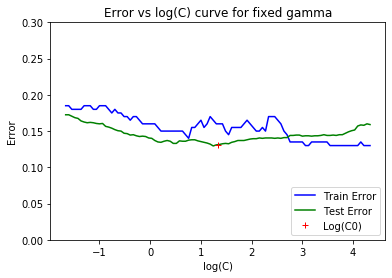

In [10]:
# -------------------------- Plotting for Part III ----------------------------------------
plt.title('Error vs log(C) curve for fixed gamma')
plt.plot(log_array, train_error_array, 'b-', label = 'Train Error')
plt.plot(log_array, test_error_array, 'g-', label = 'Test Error')
plt.plot(math.log10(C0), test_error_min, 'r+', label = 'Log(C0)')
plt.legend(loc = 'lower right')
plt.ylim(0,0.3)
plt.xlabel('log(C)')
plt.ylabel('Error')
plt.show()

C is the regularization parameter that controls the tradeoff between low training error and low testing error. Decreasing the C value creates a larger margin thus the training error increases.


Increasing the values of C, results in a smaller margin  being created. It will include the outliers and tend to overfit the data. Thus the training error will decrease but the testing error increases.
After C0 the model gradually overfits so testing error increases after this point.

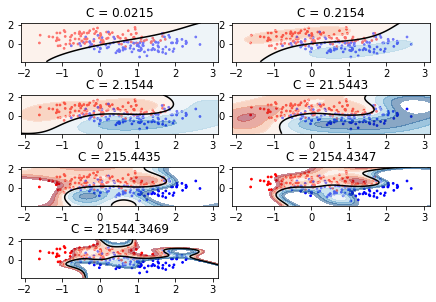

In [11]:
# ----------------------------- Plotting for Part IV ----------------------------
log_tempC1 = math.log10(C0)-3
log_tempC2 = math.log10(C0)+3
logC_array = np.logspace(log_tempC1, log_tempC2, num = 7)
count = 0
for C_i in np.nditer(logC_array):
    count += 1
    clf = SVC(gamma = gamma0, C = C_i)
    clf.fit(X_train,Y_train)
    plot_i = plt.subplot(4,2,count)
    plt.tight_layout(pad=0.00001, w_pad=0.00000000001, h_pad=0.00000001)
    #plot_i.margins(0.5,0.5)
    plot_i.set_title('C = {:.4f}'.format(C_i))
    dfContour(clf, train_data)
plt.show()
   

Here we see the fourth plot is of C = C0. C values less than this have resulted in a more generalized classification and a larger margin as explained above. This will increases the training error. 

The last 3 plots are plotted with C > C0. This has resulted in a more specific classification with a smaller margin. We can see that the classifier has tried to incorporate every single point which might even be a outlier. This will decrease the training error but due to overfitting, the test error will increase.

In [12]:
#--------------------------- Calculations for Part V ----------------------------
train_error_array = []
test_error_array = []
log_array = []
log_tempG1 = math.log10(gamma0)-3
log_tempG2 = math.log10(gamma0)+3
logG_array = np.logspace(log_tempG1, log_tempG2, num = 100)
for gamma_j in np.nditer(logG_array):
    log_array.append(math.log10(gamma_j))
    clf = SVC(gamma = gamma_j, C = C0)
    clf.fit(X_train,Y_train)
    
    clf.predict(X_train)
    clf.decision_function(X_train)
    train_error = 1-clf.score(X_train,Y_train)
    train_error_array.append(train_error)
    
    clf.predict(X_test)
    clf.decision_function(X_test)
    test_error = 1-clf.score(X_test,Y_test)
    test_error_array.append(test_error)
    

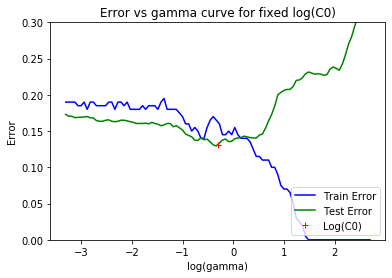

In [13]:
# -------------------------- Plotting for Part V ----------------------------------------
plt.title('Error vs gamma curve for fixed log(C0)')
plt.plot(log_array, train_error_array, 'b-', label = 'Train Error')
plt.plot(log_array, test_error_array, 'g-', label = 'Test Error')
plt.plot(math.log10(gamma0), test_error_min, 'r+', label = 'Log(C0)')
plt.legend(loc = 'lower right')
plt.ylim(0,0.3)
plt.xlabel('log(gamma)')
plt.ylabel('Error')
plt.show()

Gamma paprmeter in SVM indicates how far influence of a single training example reaches. Low values of gamma indicate ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
When gamma is very small, the model becomes generalized one. Thus the training error increases and the testing error might decrease.

When the gamma increases, it results in a more specific classification which includes outliers. This results in overfitting of data. As a result training error improves and thus decreases. BUt the testing error increases as various points are incorrectly classified due to overfitting. Thus the testing error decreases up to a point (Gamma0) and then increases again. 

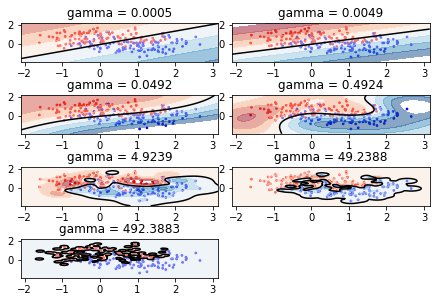

In [14]:
#-------------------------------- Plotting for Part VI ---------------------------
log_tempG1 = math.log10(gamma0)-3
log_tempG2 = math.log10(gamma0)+3
logG_array = np.logspace(log_tempG1, log_tempG2, num = 7)
count = 0
for gamma_j in np.nditer(logG_array):
    count += 1
    clf = SVC(gamma = gamma_j, C = C0)
    clf.fit(X_train,Y_train)

    plt.subplot(4,2,count, title = 'gamma = {:.4f}'.format(gamma_j))
    plt.tight_layout(pad=0.00001, w_pad=0.00000000001, h_pad=0.00000001)
    dfContour(clf, train_data)
plt.show()

Here the 4th plot is for gamma = gamma0. When gamma is very small(gamma < gamma0), the model is too constrained and cannot capture the complexity of the data. The region of influence of any selected support vector would include the whole training set. This results in a generalized classification similar to a linear model with a set of hyperplanes to separate the two classes.


For the last 3 plots, gamma> gamma0, thus the radius of influence of support vectors is small and includes the suppor vectors itself. Thus every single outlier is also classified. This can be seen with so many black boundaries in the last 3 plots.